In [1]:
import numpy as np
from PySDM.physics.constants import si
from PySDM_examples.Luettmer_homogeneous_freezing.commons import run_simulations, hom_pure_droplet_freezing_backend, hom_pure_droplet_freezing_standard_setup
from PySDM_examples.Luettmer_homogeneous_freezing import plot
from importlib import reload
from open_atmos_jupyter_utils import show_plot
from matplotlib import pyplot

In [2]:
# General settings
hom_freezing_types     = [  "KoopMurray2016", "Spichtinger2023" ]
hom_freezing_labels    = [      "KM16",             "SP23"]
number_of_nsd = (1e2, 1e3, 1e4)
vertical_updrafts = np.geomspace(0.2,10,num=9) * si.meter / si.second
number_concentrations = np.geomspace(100, 20000, num=10) / si.cm ** 3

backends = hom_pure_droplet_freezing_backend()
standard = hom_pure_droplet_freezing_standard_setup()

# Do additional simulations and plots for testing
calc_and_show_bulk_plots = True

In [ ]:
# High output step reference simulations
setting_dict = {
            **standard,
            "backend": backends["KoopMurray2016"],
            "hom_freezing": "KoopMurray2016",
            "w_updraft": 5.,
            "deposition_enable": True,
            "n_output": 1,
             "n_sd": int(1e4),
            }
reference_high_dep_KoopMurray2016_simulation = run_simulations(setting_dict)
setting_dict = {
            **standard,
            "backend": backends["Spichtinger2023"],
            "hom_freezing": "Spichtinger2023",
            "w_updraft": 5.,
            "deposition_enable": True,
            "n_output": 1,
             "n_sd": int(1e4),
            }
reference_high_dep_Spichtinger2023_simulation = run_simulations(setting_dict)

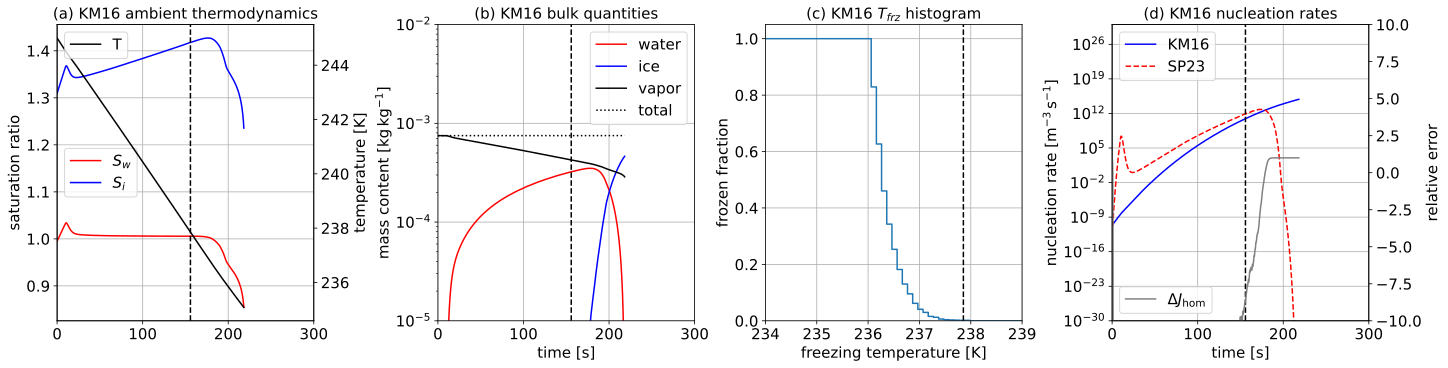

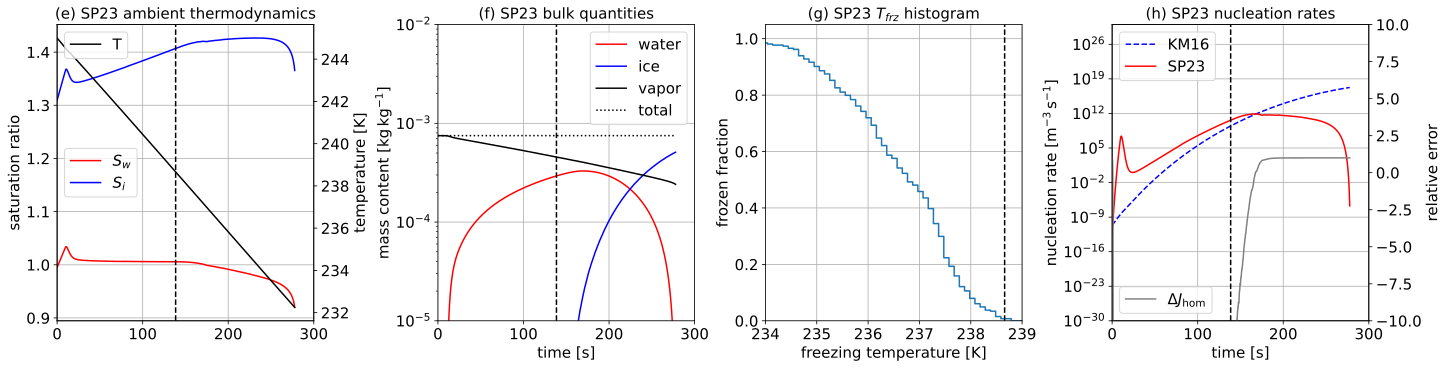

In [11]:
panel_labels = ["(a)", "(b)", "(c)", "(d)"]
frz_label = " KM16 "
panel_labels = [label + frz_label for label in panel_labels]
plot.plot_thermodynamics_and_bulk(reference_high_dep_KoopMurray2016_simulation, title_add=panel_labels, t_lim=300.)
show_plot("fig_sup_11")

panel_labels = ["(e)", "(f)", "(g)", "(h)"]
frz_label = " SP23 "
panel_labels = [label + frz_label for label in panel_labels]
plot.plot_thermodynamics_and_bulk(reference_high_dep_Spichtinger2023_simulation, title_add=panel_labels, t_lim=300.)
show_plot("fig_sup_12")

In [12]:
# Simulations for n_sd ensemble with deposition
nsd_ensemble_deposition = {}
nsd_ensemble_deposition["ens_variable"] = number_of_nsd
nsd_ensemble_deposition["ens_variable_name"] = "n_sd"
nsd_ensemble_deposition["hom_freezing_types"] = hom_freezing_types
nsd_ensemble_deposition["hom_freezing_labels"] = hom_freezing_labels

for hom_freezing_type in hom_freezing_types:
    nsd_ensemble_deposition[hom_freezing_type] = []
    for n_sd in number_of_nsd:
        setting_dict = {
            **standard,
            "n_sd": int(n_sd),
            "backend": backends[hom_freezing_type],
            "hom_freezing": hom_freezing_type,
            "number_of_ensemble_runs": 5,
            "deposition_enable": True,
            }
        nsd_ensemble_deposition[hom_freezing_type].append( run_simulations(setting_dict) )

In [13]:
# Simulations for updraft histogram with deposition
updraft_ensemble_deposition = {}
updraft_ensemble_deposition["ens_variable"] = vertical_updrafts
updraft_ensemble_deposition["ens_variable_name"] = "w_updraft"
updraft_ensemble_deposition["hom_freezing_types"] = hom_freezing_types
updraft_ensemble_deposition["hom_freezing_labels"] = hom_freezing_labels

for hom_freezing_type in hom_freezing_types:
    updraft_ensemble_deposition[hom_freezing_type] = []
    for updraft in vertical_updrafts:
        setting_dict = {
            **standard,
            "w_updraft": updraft  * si.meter / si.second,
            "n_sd": int(1e4),
            "backend": backends[hom_freezing_type],
            "hom_freezing": hom_freezing_type,
            "number_of_ensemble_runs": 1,
            }

        updraft_ensemble_deposition[hom_freezing_type].append( run_simulations(setting_dict) )

In [14]:
# Simulations for CCN concentration histogram
ccn_ensemble_deposition = {}
ccn_ensemble_deposition["ens_variable"] = number_concentrations
ccn_ensemble_deposition["ens_variable_name"] = "n_ccn"
ccn_ensemble_deposition["hom_freezing_types"] = hom_freezing_types
ccn_ensemble_deposition["hom_freezing_labels"] = hom_freezing_labels

for hom_freezing_type in hom_freezing_types:
    ccn_ensemble_deposition[hom_freezing_type] = []
    for n_dv in number_concentrations:
        setting_dict = {
            **standard,
            "n_sd": int(1e4),
            "n_ccn": n_dv,
            "backend": backends[hom_freezing_type],
            "hom_freezing": hom_freezing_type,
        }
        ccn_ensemble_deposition[hom_freezing_type].append(run_simulations(setting_dict))

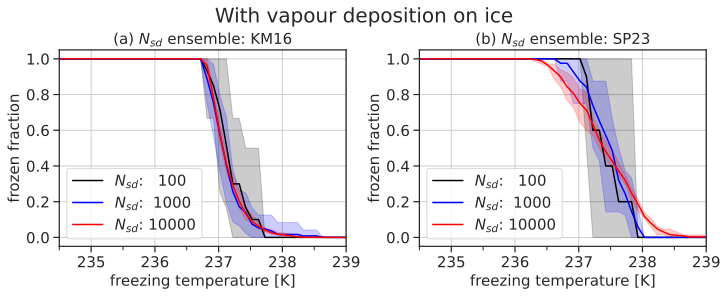

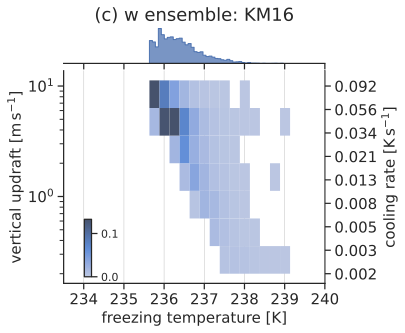

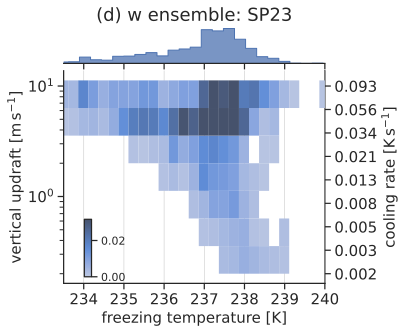

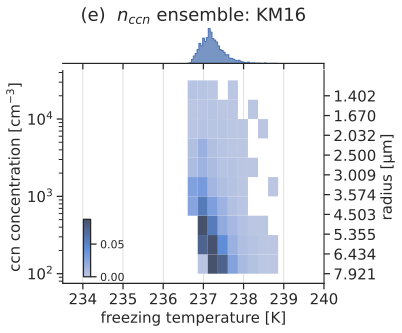

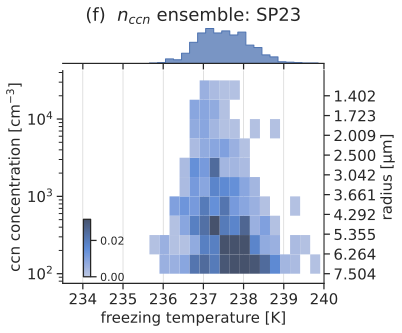

In [17]:
# Plot Figure 4
reload(plot)
fig_name = "fig4_"
fig, axs = pyplot.subplots(1, 2, figsize=(10, 4), constrained_layout=True)
fig.suptitle("With vapour deposition on ice",fontsize=20)

axs = axs.ravel()

axs[0] = plot.plot_freezing_temperatures_histogram_allinone(axs[0], nsd_ensemble_deposition["KoopMurray2016"], title = r"(a) $N_{sd}$ ensemble: KM16", lloc="lower left")
axs[1] = plot.plot_freezing_temperatures_histogram_allinone(axs[1], nsd_ensemble_deposition["Spichtinger2023"], title = r"(b) $N_{sd}$ ensemble: SP23", lloc="lower left")
show_plot(fig_name+"ab")

plot.plot_freezing_temperatures_2d_histogram_seaborn(updraft_ensemble_deposition, "KoopMurray2016", title = "(c) w ensemble: KM16")
show_plot(fig_name+"c")

plot.plot_freezing_temperatures_2d_histogram_seaborn(updraft_ensemble_deposition, "Spichtinger2023", title = "(d) w ensemble: SP23")
show_plot(fig_name+"d")

plot.plot_freezing_temperatures_2d_histogram_seaborn(ccn_ensemble_deposition, "KoopMurray2016", title = r"(e)  $n_{ccn}$ ensemble: KM16")
show_plot(fig_name+"e")

plot.plot_freezing_temperatures_2d_histogram_seaborn(ccn_ensemble_deposition, "Spichtinger2023", title = r"(f)  $n_{ccn}$ ensemble: SP23")
show_plot(fig_name+"f")

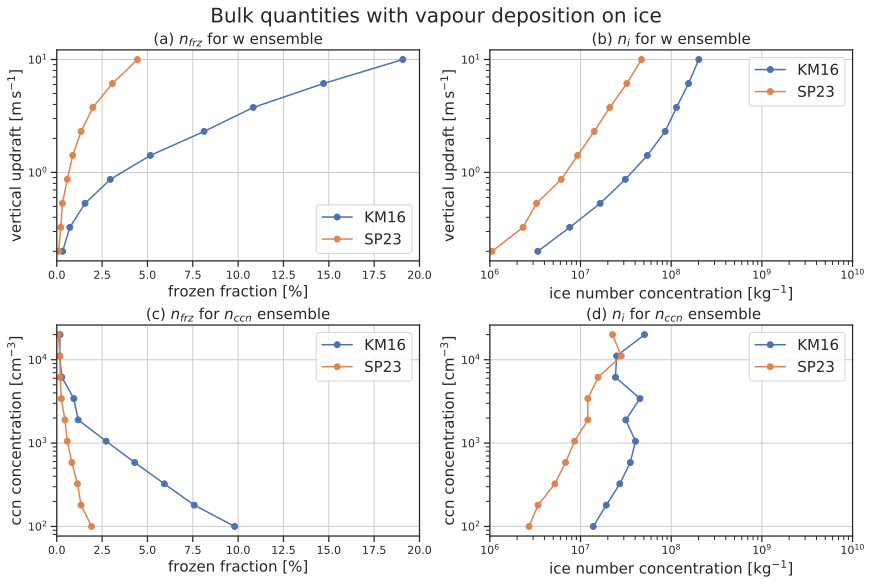

In [26]:
# Plot figure 5
reload(plot)
fig_name = "fig5"
fig, axs = pyplot.subplots(2, 2, figsize=(12, 8), constrained_layout=True)
fig.suptitle("Bulk quantities with vapour deposition on ice",fontsize=20)

axs = axs.ravel()
axs[0] = plot.plot_ensemble_bulk(axs[0],[updraft_ensemble_deposition,], "freezing_fraction", title_add="(a)")
axs[1] = plot.plot_ensemble_bulk(axs[1],[updraft_ensemble_deposition,], "ni", title_add="(b)")
axs[2] = plot.plot_ensemble_bulk(axs[2],[ccn_ensemble_deposition,], "freezing_fraction", title_add="(c)")
axs[3] = plot.plot_ensemble_bulk(axs[3],[ccn_ensemble_deposition,], "ni", title_add=" (d)")


show_plot(fig_name)